In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://www.dropbox.com/s/jztol5j7hvm2w96/brain_tumor%20data%20set.zip

In [ ]:
!unzip '/content/brain_tumor data set.zip'

In [ ]:
!rm '/content/brain_tumor data set.zip'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import shutil
import math
import imutils
import cv2

In [ ]:
ROOT_DIR='/content/Brain Tumor Data Set'

num_of_images={}

for dir in os.listdir(ROOT_DIR):
  num_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))

num_of_images

{'Brain Tumor': 2513, 'Healthey': 2087}

In [ ]:
if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./train/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),
                                size=(math.floor(70/100*num_of_images[dir])-5),replace=False):
      O=os.path.join(ROOT_DIR,dir,img)
      D=os.path.join("./train",dir)
      shutil.copy(O,D)
      os.remove(O)
else:
  print("Train Folder Exists")

In [ ]:
if not os.path.exists("./val"):
  os.mkdir("./val")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./val/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),
                                size=(math.floor(15/100*num_of_images[dir])-5),replace=False):
      O=os.path.join(ROOT_DIR,dir,img)
      D=os.path.join("./val",dir)
      shutil.copy(O,D)
      os.remove(O)
else:
  print("Val Folder Exists")

In [ ]:
if not os.path.exists("./test"):
  os.mkdir("./test")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./test/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),
                                size=(math.floor(15/100*num_of_images[dir])-5),replace=False):
      O=os.path.join(ROOT_DIR,dir,img)
      D=os.path.join("./test",dir)
      shutil.copy(O,D)
      os.remove(O)
else:
  print("Test Folder Exists")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization,MaxPooling2D,GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing import image
import keras

In [ ]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))
#how the training should proceed and this is important`
model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [ ]:
#model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
train_datagen=image.ImageDataGenerator(
    zoom_range=0.2,shear_range=0.2,rescale=1./255,horizontal_flip=True
)
val_datagen=image.ImageDataGenerator(rescale=1./255)
test_datagen=image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_data=train_datagen.flow_from_directory(directory='/content/train',target_size=(224,224),batch_size=32,
                                             class_mode='binary')

Found 3209 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthey': 1}

In [ ]:
val_data=val_datagen.flow_from_directory(directory='/content/val',target_size=(224,224),batch_size=32,
                                             class_mode='binary')

Found 679 images belonging to 2 classes.


In [ ]:
test_data=test_datagen.flow_from_directory(directory='/content/test',target_size=(224,224),batch_size=32,
                                             class_mode='binary')

Found 679 images belonging to 2 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=5,verbose=1,mode='auto')

mc=ModelCheckpoint(filepath='best_model.h5',monitor='val_accuracy',verbose=1,save_best_only=True,mode='auto')

call_back=[es,mc]

In [ ]:
hist=model.fit_generator(generator=train_data,
                         steps_per_epoch=8,
                         epochs=30,verbose=1,
                         validation_data=val_data,
                         validation_steps=16,
                         callbacks=call_back)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.6964 - accuracy: 0.5352
Epoch 1: val_accuracy improved from -inf to 0.59766, saving model to best_model.h5
8/8 [==============================] - 15s 741ms/step - loss: 0.6964 - accuracy: 0.5352 - val_loss: 0.6456 - val_accuracy: 0.5977
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.6770 - accuracy: 0.5781
Epoch 2: val_accuracy improved from 0.59766 to 0.65039, saving model to best_model.h5
8/8 [==============================] - 5s 628ms/step - loss: 0.6770 - accuracy: 0.5781 - val_loss: 0.6407 - val_accuracy: 0.6504
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.6461 - accuracy: 0.6133
Epoch 3: val_accuracy did not improve from 0.65039
8/8 [==============================] - 7s 942ms/step - loss: 0.6461 - accuracy: 0.6133 - val_loss: 0.6105 - val_accuracy: 0.6074
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.6189 - accuracy: 0.6289
Epoch 4: val_accuracy im

In [ ]:
from keras.models import load_model

model=load_model("/content/best_model.h5")

In [ ]:
acc=model.evaluate_generator(generator=test_data)[1]

print(f'The accuracy of your model is = {acc*100}%')

The accuracy of your model is = 83.0633282661438%


In [ ]:
h=hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

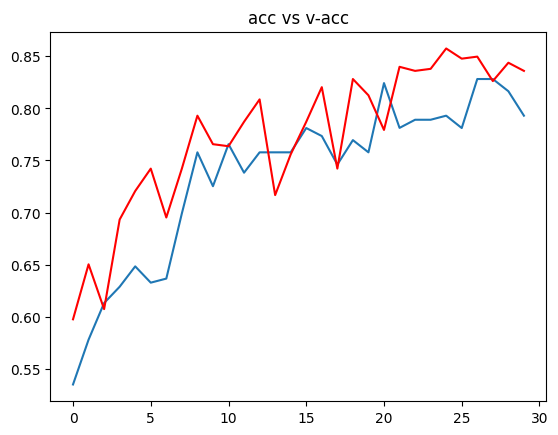

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='red')
plt.title('acc vs v-acc')
plt.show()

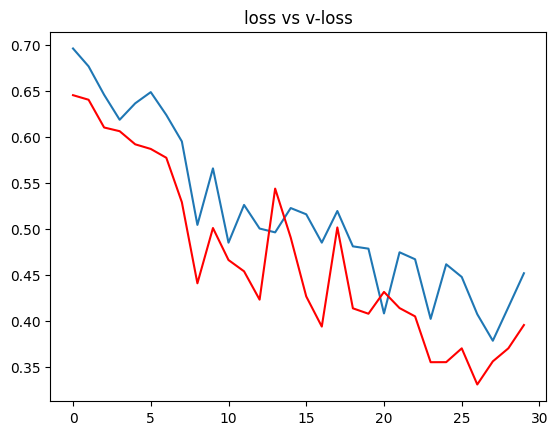

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c='red')
plt.title("loss vs v-loss")
plt.show()

1/1 [==============================] - 0s 24ms/step
0.49258128
The MRI image is of BRAIN TUMOR



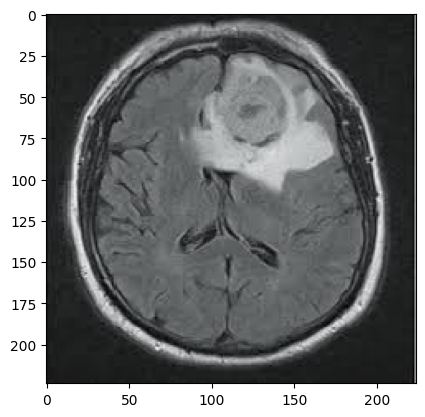

In [ ]:
path='/content/val/Brain Tumor/Cancer (1008).jpg'
img=image.load_img(path,target_size=(224,224),  )

i=image.img_to_array(img)/255
input_arr=np.array([i])
input_arr.shape
plt.imshow(i)

pred=model.predict(input_arr)[0][0]
print(pred)

if pred<0.5:
  print("The MRI image is of BRAIN TUMOR\n")
else:
  print("The MRI image is of HEALTHY BRAIN\n")